In [1]:
!pip install tensorflow==2.0.0-rc0

In [2]:
!pip install mlxtend==0.17.0

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

In [0]:
from tensorflow.keras.datasets import cifar10

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [7]:
print(np.max(X_train))
print(np.max(X_test))

255
255


In [0]:
X_train=X_train/np.max(X_train)
X_test=X_test/np.max(X_test)

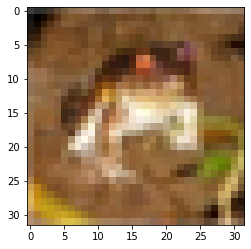

In [9]:
plt.figure()
plt.imshow(X_train[0])

In [10]:
X_train[0].shape

(32, 32, 3)

**CNN Model**

In [0]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(2, 2), strides=(1, 1), padding='same', activation='relu', input_shape=X_train[0].shape))
model.add(Conv2D(filters=32, kernel_size=(2, 2), strides=(1, 1), padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(2, 2), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(3, 3), strides=(1, 1), padding='valid'))
model.add(Conv2D(filters=32, kernel_size=(2, 2), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
model.add(Flatten())
model.add(Dense(150, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4128      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4128      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 32)        4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 26912)             0

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, batch_size=10000, epochs=20)

Train on 50000 samples
Epoch 1/20
50000/50000 [==============================] - 24s 472us/sample - loss: 0.5201 - accuracy: 0.8220
Epoch 2/20
50000/50000 [==============================] - 24s 472us/sample - loss: 0.4880 - accuracy: 0.8340
Epoch 3/20
50000/50000 [==============================] - 23s 470us/sample - loss: 0.4659 - accuracy: 0.8459
Epoch 4/20
50000/50000 [==============================] - 23s 467us/sample - loss: 0.4550 - accuracy: 0.8484
Epoch 5/20
50000/50000 [==============================] - 23s 465us/sample - loss: 0.4461 - accuracy: 0.8530
Epoch 6/20
50000/50000 [==============================] - 24s 475us/sample - loss: 0.4329 - accuracy: 0.8574
Epoch 7/20
50000/50000 [==============================] - 23s 466us/sample - loss: 0.4347 - accuracy: 0.8559
Epoch 8/20
50000/50000 [==============================] - 23s 465us/sample - loss: 0.4476 - accuracy: 0.8485
Epoch 9/20
50000/50000 [==============================] - 23s 467us/sample - loss: 0.5734 - accuracy: 0.8

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
y_pred = model.predict_classes(X_test)

In [20]:
print(accuracy_score(y_test, y_pred))

0.714


In [21]:
print(y_test)

[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


In [22]:
print(y_pred)

[3 8 0 ... 5 1 7]


**Learning Curve**

In [0]:
## Accuracy Score with Number of Epochs

Text(0, 0.5, 'Accuracy')

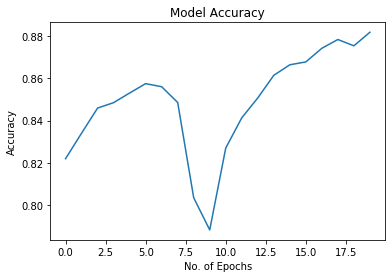

In [24]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.title("Model Accuracy")
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')

In [0]:
## Loss with Number of Epochs

AttributeError: ignored

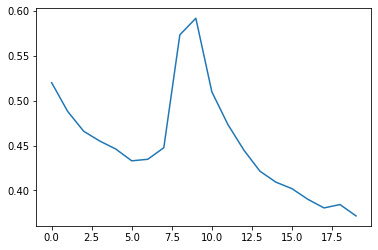

In [26]:
plt.figure()
plt.plot(history.history['loss'])
plt.label("Model loss")
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')

**Confusion Matix**

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f53c54a9390>)

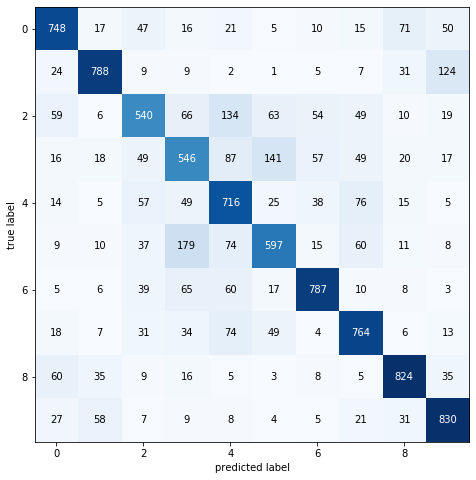

In [28]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, figsize=(8, 8))